pi/2 =  0.5782172325201153 3*pi/2 =  0.2730047501302266


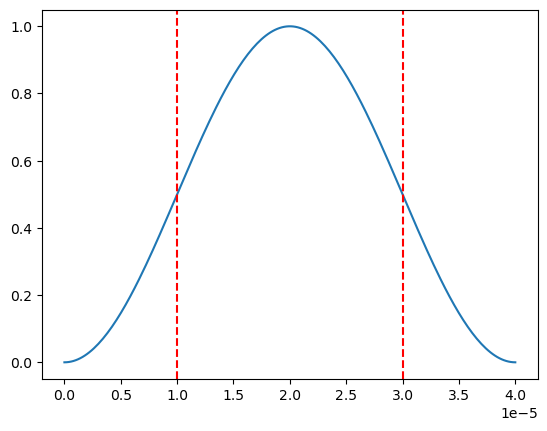

In [119]:
import matplotlib.pyplot as plt

def rabi_oscillation(t, omega, A):
    return A * np.sin(omega * t / 2)**2

A = 1
pi_time = 20e-6
omega = np.pi/(pi_time)
pi_time_guess = 22e-6
t = np.linspace(0,2*pi_time,200)

plt.figure()
plt.plot(t,rabi_oscillation(t,omega,A))
plt.axvline(x=pi_time/2, color='r', linestyle='--', label='Vertical line at x=2')
plt.axvline(x=3*pi_time/2, color='r', linestyle='--', label='Vertical line at x=2')

P1 = rabi_oscillation(pi_time_guess/2,omega,A)
P2 = rabi_oscillation(3*pi_time_guess/2,omega,A)
print('pi/2 = ',P1 ,'3*pi/2 = ',P2)

In [133]:
import numpy as np
from scipy.optimize import curve_fit

# Define the Rabi oscillation model
def rabi_oscillation(t, omega, A):
    return A * np.sin(omega * t / 2)**2

pi_time = 20e-6
omega = np.pi/pi_time
pi_time_guess = 20e-6

t1 = pi_time/2
t2 = 3*pi_time/2

P1 = rabi_oscillation(t1,omega,A)-0.05
P2 = rabi_oscillation(t2,omega,A)-0.05

t_data = np.array([t1, t2])  
P_data = np.array([P1, P2])  

initial_guess = [np.pi/pi_time_guess, 1.0]

# Perform the curve fitting
params, params_covariance = curve_fit(rabi_oscillation, t_data, P_data, p0=initial_guess)

# Extract the Rabi frequency and amplitude
omega_fitted, A_fitted = params

print(f"Fitted Rabi frequency: {np.pi/omega_fitted}")
print(f"Fitted amplitude: {A_fitted}")


Fitted Rabi frequency: 2e-05
Fitted amplitude: 0.9


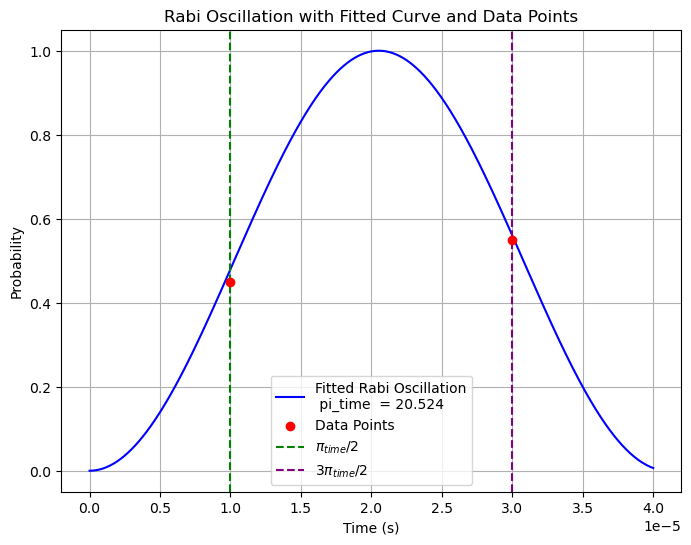

In [147]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, minimize 

# Define the Rabi oscillation model
def rabi_oscillation(t, omega,A):
    A = 1
    return A * np.sin(omega * t / 2)**2

def diff_points(omega):
    P_data = (rabi_oscillation(t1,omega,A) - P1)**2 + (rabi_oscillation(t2,omega,A) - P2)**2
    return P_data

# Parameters
pi_time = 20e-6  # Known pi time (for generating data)
omega = np.pi / pi_time  # Actual Rabi frequency
A = 1.0  # Assume an amplitude of 1.0
pi_time_guess = 20.1e-6  # Initial guess for fitting

# Time points for the two data points
t1 = pi_time / 2
t2 = 3 * pi_time / 2

# Calculate the probabilities at these time points
P1 = rabi_oscillation(t1, omega,A)-0.05
P2 = rabi_oscillation(t2, omega,A)+0.05

# Data points (t1, P1) and (t2, P2)
t_data = np.array([t1, t2])  
P_data = np.array([P1, P2])

# Initial guesses for the fitting (omega and A)
initial_guess = [np.pi / pi_time_guess,1]

# Perform the curve fitting to find omega and A
params, params_covariance = curve_fit(rabi_oscillation, t_data, P_data, p0=initial_guess)
# opt_omega = minimize(diff_points,initial_guess)
# print("Freq found",np.pi/(opt_omega.x))

# Extract the fitted Rabi frequency and amplitude
omega_fitted,A_fitted = params


# Plotting the data points and the fitted curve
t_plot = np.linspace(0, 2 * pi_time, 1000)  # Time values for plotting the fitted curve
P_plot = rabi_oscillation(t_plot, omega_fitted,A_fitted)  # Fitted curve

# Plot the data points and the fitted curve
plt.figure(figsize=(8, 6))
plt.plot(t_plot, P_plot, label=f'Fitted Rabi Oscillation\n pi_time  = {np.round((np.pi/omega_fitted)*1e6,3)}', color='blue')
plt.scatter(t_data, P_data, color='red', label='Data Points', zorder=5)

# Plot vertical lines at pi_time/2 and 3*pi_time/2
plt.axvline(t1, color='green', linestyle='--', label=r'$\pi_{time}/2$')
plt.axvline(t2, color='purple', linestyle='--', label=r'$3\pi_{time}/2$')

# Labels and title
plt.xlabel('Time (s)')
plt.ylabel('Probability')
plt.title('Rabi Oscillation with Fitted Curve and Data Points')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()
